In [1]:
# importing libraries

import tensorflow as tf
import matplotlib.pyplot as plt


In [11]:
# Loading dataset

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

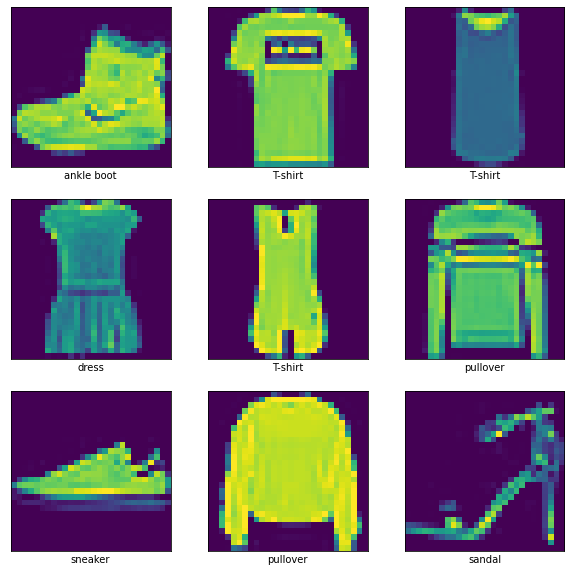

In [6]:
# show the images
class_names = ['T-shirt', 'trousers', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

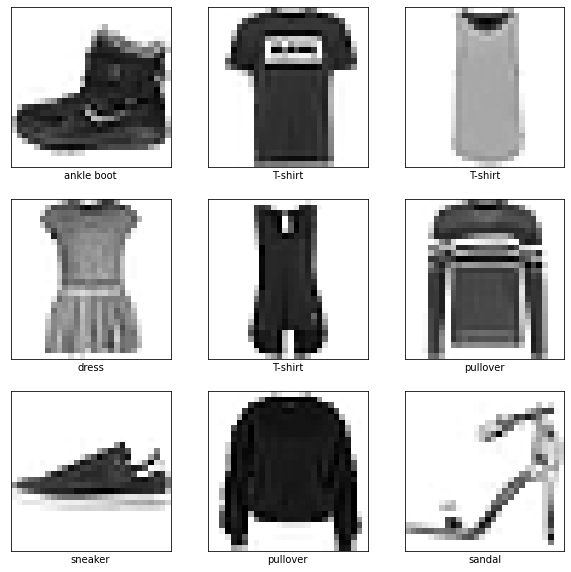

In [7]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
#Finding total number of images in training and test set

print(len(train_images))
print(len(test_images))

60000
10000


In [14]:
# reshaping
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [15]:
# Model creation
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
        ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this:

 ---------------------------------------------
 ---------------------------------------------

progres_bar

verbose=2 will just mention the number of epoch like this:

enter image description here

In [17]:
# train
model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.9911 - accuracy: 0.8482
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2811 - accuracy: 0.8984
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2438 - accuracy: 0.90990s - loss: 0.2438 - accuracy: 
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2238 - accuracy: 0.91800s - loss: 0.2239 - accuracy: 0.91
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2098 - accuracy: 0.92 - 52s 28ms/step - loss: 0.2099 - accuracy: 0.9225
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1903 - accuracy: 0.9294
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1762 - accuracy: 0.9354
Epoch 8/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1643 - accuracy: 0.9395
Epoch 9/10
1875/1875 [==============================] - 48s 26

In [18]:
print("Test accuracy: ", test_acc)



Test accuracy:  0.8949999809265137


In [19]:
# Model creation
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
        ])
model.summary()
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])
# train
model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print("Test accuracy: ", test_acc)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

In [20]:
model.save("png image model using cnn.h5")